In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt


In [2]:
import pandas as pd

# Load the dataset into a pandas dataframe
df = pd.read_csv('AHRI_DATASET_PM_MANUSCRIPT_DATA.csv')
df


,CASEID_7139,COHORTS,PYS_USE_VENN,PSY_USE_YN,PM_USE_YN,PM_USE_ONLY_YN,PM_VS_PSY_YN,SEX,AGE,ETHNICITY,...,PSY2_UNDIAG_CONCERN,PSY2_NO_KNOWLEDGE,PM1_GEN_HEALTH,PM1_DIAG_CONDITION,PM1_UNDIAG_CONCERN,PM2_FREQ_COVID,PM3_FREQ_POLITICS,PM4_CARE,INSURANCE,DATA_WEIGHT
0,1,1.0,1.0,1.0,1.0,1.0,2.0,0,19.0,3.0,...,0,0,1,0,0,2,3,0,0,57772.54
1,2,1.0,1.0,1.0,1.0,1.0,2.0,0,21.0,2.0,...,1,0,1,0,0,3,3,0,1,25738.42
2,3,1.0,1.0,1.0,1.0,1.0,2.0,0,22.0,2.0,...,1,0,0,0,0,3,4,0,0,42172.56
3,4,1.0,1.0,1.0,1.0,1.0,2.0,0,22.0,2.0,...,0,0,1,0,0,3,3,0,1,28356.81
4,5,1.0,1.0,1.0,1.0,1.0,2.0,0,23.0,2.0,...,1,0,1,0,0,3,3,0,1,25738.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7134,7135,-99.0,2.0,1.0,1.0,0.0,2.0,1,60.0,2.0,...,1,0,0,0,0,3,3,0,1,59464.33
7135,7136,-99.0,3.0,1.0,0.0,0.0,1.0,1,64.0,1.0,...,0,1,-99,-99,-99,-99,-99,-99,1,15186.20
7136,7137,-99.0,3.0,1.0,0.0,0.0,1.0,1,64.0,2.0,...,0,0,-99,-99,-99,-99,-99,-99,1,57633.55
7137,7138,-99.0,2.0,1.0,1.0,0.0,2.0,1,67.0,2.0,...,0,0,1,0,0,1,1,1,1,43895.51


In [3]:
df.COHORTS.value_counts()

df.columns


Index(['CASEID_7139', 'COHORTS', 'PYS_USE_VENN', 'PSY_USE_YN', 'PM_USE_YN',
       'PM_USE_ONLY_YN', 'PM_VS_PSY_YN', 'SEX', 'AGE', 'ETHNICITY', 'HLS_YN',
       'REGION', 'ED', 'EMPL', 'INCOME', 'BMI', 'C_TOTAL', 'C_DP', 'C_ANX',
       'C_PN', 'C_ALL', 'C_MI', 'C_INSOM', 'C_HYP', 'C_DH', 'C_SA', 'C_GERD',
       'C_CS', 'C_LIP', 'CCI_SCORE', 'GAD7_SCORE', 'PHQ9_SCORE', 'GAD7_GE10',
       'PHQ9_GE10', 'PCS12', 'MCS12', 'VR6D', 'RU_PCP_YN', 'RU_SPECIAL_YN',
       'RU_OTPCP_YN', 'RU_UCC_YN', 'RU_OUTPT_YN', 'RU_ER_YN', 'RU_HSP_YN',
       'PSY1_POSITIVE_USE', 'PSY2_GEN_HEALTH', 'PSY2_DIAG_CONDITION',
       'PSY2_UNDIAG_CONCERN', 'PSY2_NO_KNOWLEDGE', 'PM1_GEN_HEALTH',
       'PM1_DIAG_CONDITION', 'PM1_UNDIAG_CONCERN', 'PM2_FREQ_COVID',
       'PM3_FREQ_POLITICS', 'PM4_CARE', 'INSURANCE', 'DATA_WEIGHT'],
      dtype='object')

In [4]:
def labelize(cohort):
    if cohort == 0:
        return 0
    else:
        return 1
df['label'] = df['COHORTS'].apply(labelize)

In [5]:
df.label.value_counts()


0    6613
1     526
Name: label, dtype: int64

In [6]:
df.EMPL

0       0.0
1       0.0
2       0.0
3       0.0
4       1.0
       ... 
7134    0.0
7135    0.0
7136    0.0
7137    0.0
7138    0.0
Name: EMPL, Length: 7139, dtype: float64

Accuracy: 0.9586834733893558
[[5286    0]
 [   0  425]]


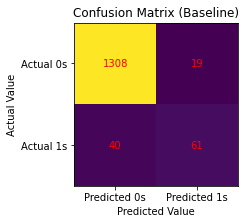

In [50]:
X = df[['SEX', 'AGE', 'ETHNICITY', 'HLS_YN','REGION', 'INSURANCE',
        'PM2_FREQ_COVID','PM3_FREQ_POLITICS',
        'PSY1_POSITIVE_USE', 'PSY2_GEN_HEALTH', 'PSY2_DIAG_CONDITION', 'PSY2_UNDIAG_CONCERN', 'PSY2_NO_KNOWLEDGE']]
y = df['label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Fit a random forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)



# Evaluate model performance on test set
accuracy = rf.score(X_test, y_test)
print(f"Accuracy: {accuracy}")



# lr = LogisticRegression(C=1.0)
# lr.fit(X_train, y_train)
# accuracy = lr.score(X_test, y_test)
# print(f"Accuracy: {accuracy}")

predictions = rf.predict(X_test)
cm = confusion_matrix(y_test, predictions)
print(conf_mat)

# conf_mat = confusion_matrix(y, model1.predict(X1))
fig, ax = plt.subplots(figsize=(3, 3))

ax.imshow(cm)
ax.grid(False)
ax.set_title('Confusion Matrix (Baseline)')
ax.set_xlabel('Predicted Value')
ax.set_ylabel('Actual Value')

ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s')) 
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s')) 
ax.set_ylim(1.5, -0.5)
for i in range(2): 
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [38]:
X = df[['SEX', 'AGE', 'ETHNICITY', 'HLS_YN','REGION', 'INSURANCE',
        'PM2_FREQ_COVID','PM3_FREQ_POLITICS',
        'PSY1_POSITIVE_USE', 'PSY2_GEN_HEALTH', 'PSY2_DIAG_CONDITION', 'PSY2_UNDIAG_CONCERN', 'PSY2_NO_KNOWLEDGE',
       'BMI', 'C_TOTAL', 'C_DP', 'C_ANX',
       'C_PN', 'C_ALL', 'C_MI', 'C_INSOM', 'C_HYP', 'C_DH', 'C_SA', 'C_GERD',
       'C_CS', 'C_LIP', 'CCI_SCORE', 'GAD7_SCORE', 'PHQ9_SCORE', 'GAD7_GE10',
       'PHQ9_GE10', 'PCS12', 'MCS12', 'VR6D']]
y = df['label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a random forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate model performance on test set
accuracy = rf.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9684873949579832


In [42]:
# predictions = rf.predict(X_test)

[[5286    0]
 [   0  425]]


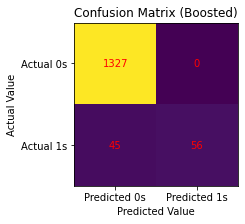

In [48]:
from sklearn.metrics import confusion_matrix
predictions = rf.predict(X_test)
cm = confusion_matrix(y_test, predictions)
print(conf_mat)

# conf_mat = confusion_matrix(y, model1.predict(X1))
fig, ax = plt.subplots(figsize=(3, 3))

ax.imshow(cm)
ax.grid(False)
ax.set_title('Confusion Matrix (Boosted)')
ax.set_xlabel('Predicted Value')
ax.set_ylabel('Actual Value')

ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s')) 
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s')) 
ax.set_ylim(1.5, -0.5)
for i in range(2): 
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

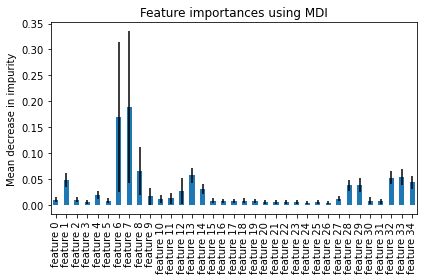

In [25]:
feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()

std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()


In [21]:
importances

array([0.0099576 , 0.04756861, 0.00943582, 0.00537636, 0.01883747,
       0.007999  , 0.17028363, 0.18849729, 0.06557569, 0.01591593,
       0.01067387, 0.01222596, 0.02616417, 0.05690302, 0.03052297,
       0.00779037, 0.00704721, 0.00798882, 0.00769264, 0.00640934,
       0.00542404, 0.00577332, 0.00571985, 0.00547329, 0.00416763,
       0.00495426, 0.0038752 , 0.01185772, 0.03737993, 0.03814334,
       0.0080852 , 0.00654371, 0.05240901, 0.05415934, 0.0431684 ])

In [15]:
importances = rf.feature_importances_

# Sort feature importance scores in descending order
indices = np.argsort(importances)[::-1]

# Print feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 7 (0.188497)
2. feature 6 (0.170284)
3. feature 8 (0.065576)
4. feature 13 (0.056903)
5. feature 33 (0.054159)
6. feature 32 (0.052409)
7. feature 1 (0.047569)
8. feature 34 (0.043168)
9. feature 29 (0.038143)
10. feature 28 (0.037380)
11. feature 14 (0.030523)
12. feature 12 (0.026164)
13. feature 4 (0.018837)
14. feature 9 (0.015916)
15. feature 11 (0.012226)
16. feature 27 (0.011858)
17. feature 10 (0.010674)
18. feature 0 (0.009958)
19. feature 2 (0.009436)
20. feature 30 (0.008085)
21. feature 5 (0.007999)
22. feature 17 (0.007989)
23. feature 15 (0.007790)
24. feature 18 (0.007693)
25. feature 16 (0.007047)
26. feature 31 (0.006544)
27. feature 19 (0.006409)
28. feature 21 (0.005773)
29. feature 22 (0.005720)
30. feature 23 (0.005473)
31. feature 20 (0.005424)
32. feature 3 (0.005376)
33. feature 25 (0.004954)
34. feature 24 (0.004168)
35. feature 26 (0.003875)


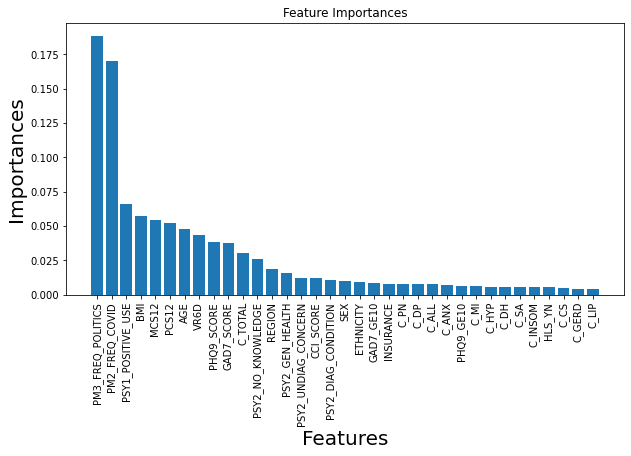

In [27]:
# indices = np.argsort(importances)[::-1]  # sort in descending order
feature_names = X_train.columns.values  # get the names of the input features
plt.figure(figsize=(10, 5))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices])


plt.xlabel('Features', fontsize=20)
plt.ylabel('Importances', fontsize=20)

plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.show()
# # Plot feature importance scores
# plt.figure(figsize=(10, 6))
# plt.title("Feature Importance Scores")
# plt.bar(range(X_train.shape[1]), importances[indices])
# plt.xticks(range(X_train.shape[1]), indices)
# plt.xlabel("Feature")
# plt.ylabel("Importance Score")
# plt.show()

<AxesSubplot:xlabel='Importance', ylabel='Feature'>

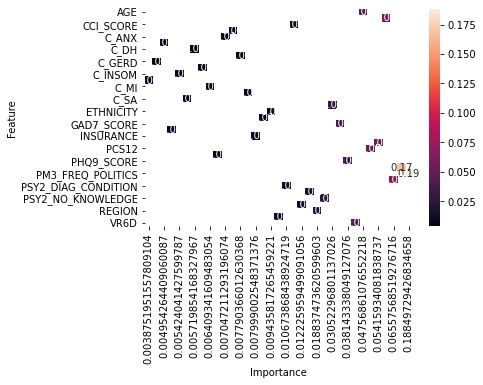

In [37]:
import seaborn as sns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Reshape the DataFrame to create a heatmap
heatmap_df = importance_df.pivot(index='Feature', columns='Importance', values='Importance')

# Create the heatmap using Seaborn
sns.heatmap(heatmap_df, annot=True, fmt='.2f')

Random forest is a popular machine learning algorithm that is well-suited for binary classification problems, which involve predicting the outcome of a binary variable based on a set of input variables. One of the key strengths of the random forest algorithm is its ability to handle complex, high-dimensional data sets with a large number of variables. It works by building multiple decision trees on randomly sampled subsets of the input variables and then aggregating their predictions to make a final prediction. This approach helps to reduce overfitting and improve the generalizability of the model, making it less prone to errors on new, unseen data. Additionally, the algorithm is highly scalable, which means it can handle large data sets efficiently and with relatively low computational resources. Overall, the random forest algorithm is a powerful and flexible tool for binary classification problems, offering high accuracy and robustness, even when faced with noisy or incomplete data.